## 3 Quartis, decis e percentis ou centis
Medidas dividem os dados em partes iguais:

1. Quartis: quatro partes
2. Decis: dez partes
3. Centis: cem partes

Qp={x(np)+1:n --> se np não é inteiro

1/2(xnp:n+xnp+1:n) --> se np é inteiro

In [13]:
lista = [2, 5, 7, 4, 1, 9, 5, 9, 2, 6, 7, 9, 4, 3, 5, 7]

import numpy as np
import pandas as pd
serie = pd.Series(lista)
serie

0     2
1     5
2     7
3     4
4     1
5     9
6     5
7     9
8     2
9     6
10    7
11    9
12    4
13    3
14    5
15    7
dtype: int64

In [14]:
#Quartis
quartis = list(np.quantile(serie, [0.25, 0.5, 0.75, 1]))
quartis

#Cálculos manual
lista_ord = sorted(lista)
n = len(lista_ord)
lista_ord

q1_m = int(n / 4)
q2_m = int((2 * n) / 4)
q3_m = int((3 * n) / 4)
print('Quartis:\n', q1_m, q2_m, q3_m)

lista_por_quartis = []
lista_por_quartis.append([lista_ord[k] for k in range(0, q1_m)])
lista_por_quartis.append([lista_ord[k] for k in range(0, q2_m)])
lista_por_quartis.append([lista_ord[k] for k in range(0, q3_m)])
lista_por_quartis
     
q1 = [lista[k]
      for k in range(0, len(lista))
      if lista[k] <= quartis[0]]
q1

q2 = [lista[k]
      for k in range(0, len(lista))
      if lista[k] > quartis[0] and lista[k] <= quartis[1]]
q2

q3 = [lista[k]
      for k in range(0, len(lista))
      if lista[k] > quartis[1] and lista[k] <= quartis[2]]
q3

q4 = [lista[k]
      for k in range(0, len(lista))
      if lista[k] > quartis[2]]
q4

#Organizando dados para conferência
sorted(lista)

Quartis:
 4 8 12


[1, 2, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, 7, 9, 9, 9]

## 4 Visualização gráfica de medidas estatísticas

In [15]:
from matplotlib import pyplot as plt

## 4.1 Quartis através do Box Plot
A figura 1 exibe um boxplot e os principais elementos estatísticos que ele representa. Como pode ser visto, sua análise permite de forma simplificada identificar diversas informações sobre o conjunto de dados estudo.

Dois elementos principais devem chamar a atenção assim que o gráfico é gerado:

1. Primeiramente deve-se buscar identificar se há valores acima do limite superior ou abaixo do limite inferior, o que indica que há outliers (valores discrepantes) no conjunto de dados que necessitem de tratamento seja pela sua remoção ou pela identificação do motivo de sua existência, conforme o tipo de análise que se deseja efetuar.
2. Em seguida deve ser analisada a posição da reta que corta a "caixa", pois esta indica a mediana dos dados e a partir dela fica visualmente mais fácil analisar a distribuição, pois um segmento de caixa maior para um lado ou para outro indica uma maior ou menor concentração dos dados naquela faixa de valores.

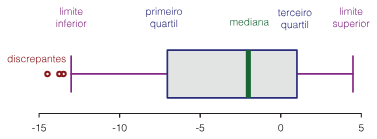

Por fim, além das duas análises iniciais, uma vez identificação a presença ou ausência de outliers e a mediana do conjunto de dados, pode-se analisar com mais detalhes a distribuição dos dados pelos quartis.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7c5d1cd40>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7c5d1d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7c5d1c290>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7c5d1d8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7c5d1dbb0>],
 'means': []}

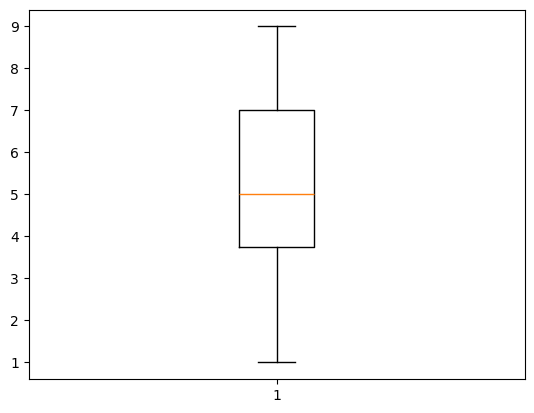

In [16]:
#Relembrando os valores da lista (organizada de maneira ordenada)
sorted(lista)

#Visualização Gráfica dos quartis através do Box Plot
plt.boxplot(lista)

Neste gráfico, analisamos a lista com o conjunto de dados simplificado usado na seção anterior. Se ele for analisado de acordo com as recomendações anteriores, podemos perceber que a distribuição dos valores nos quartis coincidem com os cálculos manuais que foram apresentados na seção 3.

Retornaremos ao gráfico de boxplot com conjunto de dados mais complexos na análise de frequência, como complemento à análise de histograma.

## 4.2 Média e mediana

In [17]:
#Biblioteca para carga de dados
import pandas as pd

arquivo = 'https://raw.githubusercontent.com/janiosl/python.ds/master/data/yahoo_stock_12-12-2020.csv'
acoes = pd.read_csv(arquivo)
acoes.head() 

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,GGBR4.SA,2010-01-04,29.799999,29.280001,29.299999,29.600000,2827700.0,25.257845
1,GGBR4.SA,2010-01-05,30.170000,29.650000,29.740000,30.100000,4480400.0,25.684504
2,GGBR4.SA,2010-01-06,30.379999,29.860001,29.959999,30.299999,4499900.0,25.855158
3,GGBR4.SA,2010-01-07,30.379999,29.520000,30.100000,29.620001,5695900.0,25.274918
4,GGBR4.SA,2010-01-08,29.879999,29.350000,29.719999,29.540001,4269500.0,25.206648


No trecho a seguir filtramos a coluna "Close" do conjunto de dados, que apresenta o preço de fechamento da ação analisada, e calculamos a media e mediana dos primeiros 30 dias. A representação gráfica permite difenciarmos as duas medidas de posição.

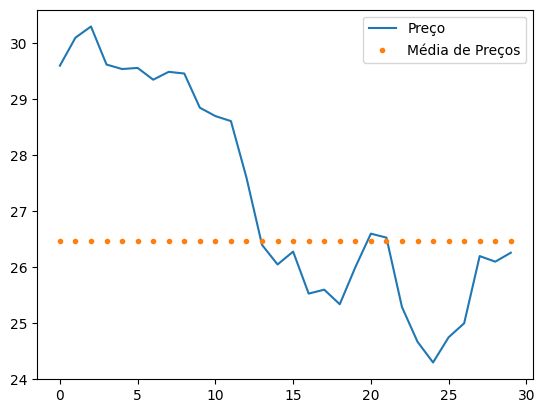

In [18]:
media = acoes.Close[:30].mean()
media

mediana = acoes.Close[:30].median()
mediana

plt.plot(acoes.Close[:30])
#plt.plot([media for k in range(0, len(acoes.Close[:30]))], '--')
plt.plot([mediana for k in range(0, len(acoes.Close[:30]))], '.')
plt.legend(['Preço', 'Média de Preços', 'Mediana de Preços'])

## 4.3 Análise de Frequência com Histograma e Box Plot
O gráfico de histograma permite analisar a distribuição de frequência dos dados ao longo das faixas de valores, exibindo barras verticais que representam a concentração de dados em cada faixa de valor. A intuição principal que se pode tirar na primeira visualização dos dados é tentar identificar a localização da maior concentração de dados, que indicaria o posicionamento do ponto médio daquele conjunto de dados.

Outra análise importante é verificar a distribuição dos dados, para identificar se ela é simétrica (Figura 2), ou seja, aproximadamente metade dos dados estão respectivamente à direita e à esquerda do ponto médio.

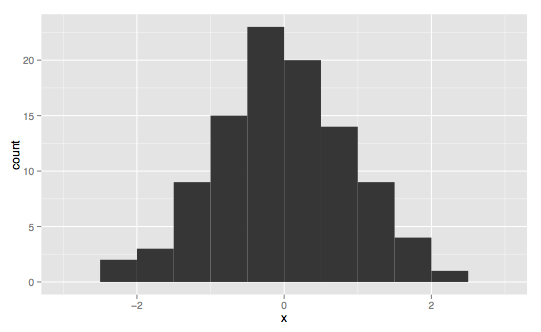

Figura 2 - Distribuição simétrica
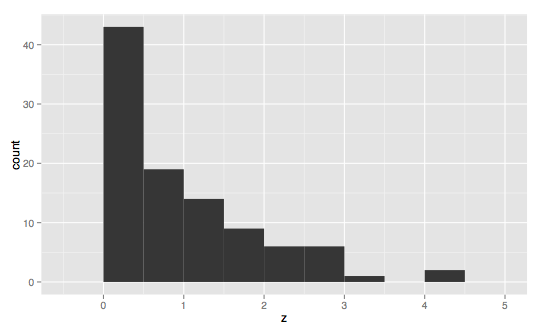

Figura 3 - Distribuição assimétrica (com calda) à direita
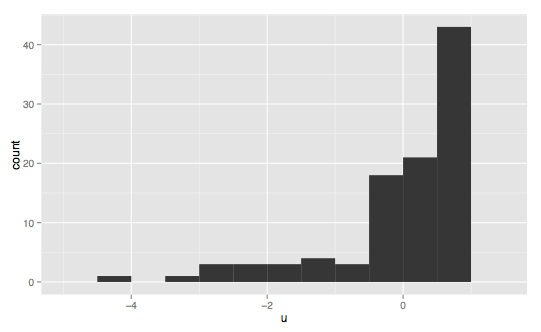

Figura 4 - Distribuição assimétrica (com calda) à esquerda

Continuando a análise do conjunto de dados de preço de ações, a seguir é apresentado o histograma do preço de fechamento de ações (Close) para o período completo.


Text(0, 0.5, 'Contagem de Observações')

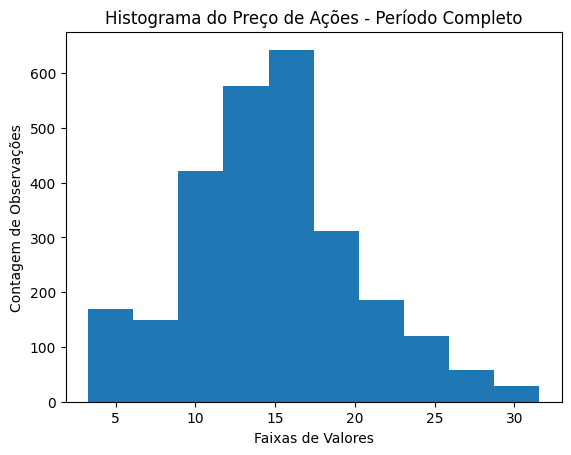

In [19]:
plt.hist(acoes.Close)
plt.title('Histograma do Preço de Ações - Período Completo')
plt.xlabel('Faixas de Valores')
plt.ylabel('Contagem de Observações')

À primeira vista os dados parecem ser simétricos, mas uma observação atenta, indica que há valores discrepantes puxando um pouco a calda dos dados para esquerda.

A geração do boxplot pode confirmar ou rejeitar esta análise inicial. Como pode ser visto na visualização deste gráfico gerada para o mesmo período, de fato há outliers após o limite superior do gráfico.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7c7f97b60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7c7ff3f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7c8084ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7c7fd7a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7c3c4c380>],
 'means': []}

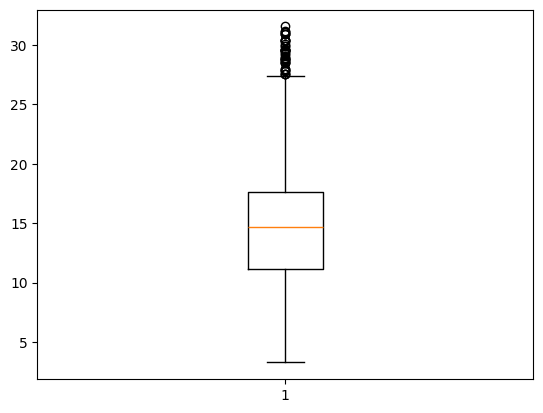

In [20]:
plt.boxplot(acoes.Close)

Agora é feito um zoom nos dados, filtrando apenas os primeiros 30 dias do período estudo. A geração dos mesmos dados, demonstram que a distribuição dos valores naquele período é bem diferente do comportamento dos dados quando analisado o período completo.Agora é feito um zoom nos dados, filtrando apenas os primeiros 30 dias do período estudo. A geração dos mesmos dados, demonstram que a distribuição dos valores naquele período é bem diferente do comportamento dos dados quando analisado o período completo.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7c5d76ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7c5d77530>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7c5d76db0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7c5d77a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7c5d77c80>],
 'means': []}

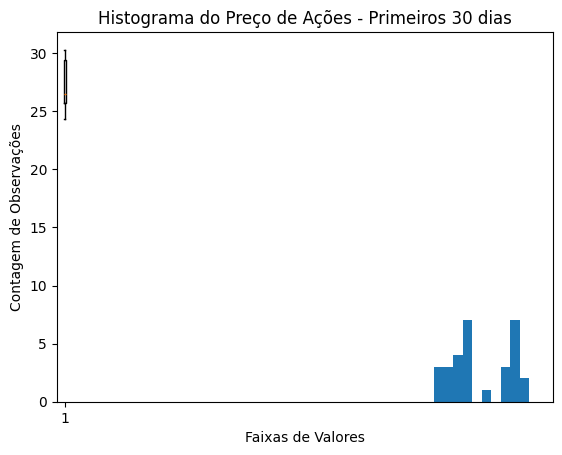

In [21]:
dias = 30
plt.hist(acoes.Close[:dias])
plt.title(f'Histograma do Preço de Ações - Primeiros {dias} dias')
plt.xlabel('Faixas de Valores')
plt.ylabel('Contagem de Observações')

plt.boxplot(acoes.Close[:30])

Por fim, carregamos outro conjunto de dados que apresenta o preço médio de casas no estado da Califórnia nos Estados Unidos e diversas características dos imóveis analisados que podem ser usadas em tarefas de regressão para predição do preço de novos imóveis.

Aqui fazemos apenas a geração dos gráfico da distribuição do preço médio usando os mesmos gráficos de histograma e boxplot, para ilustrar que em cenários reais o comportamento dos dados pode ser bem diferente dos exemplos didáticos mais simples. Deixamos para seu estudo a análise do significado dos dois gráficos para este conjunto de dados.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7c5dfecc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7c5dff290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7c5dfeab0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7c5dff7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7c5dffa40>],
 'means': []}

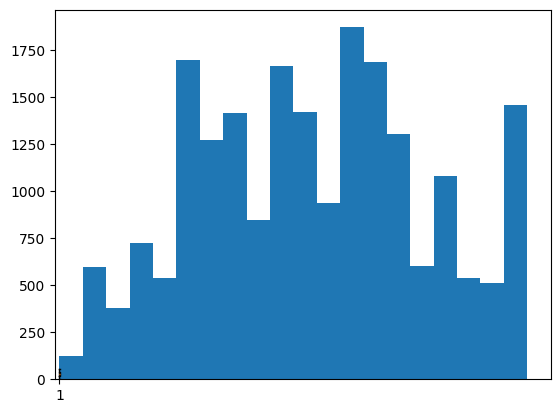

In [22]:
arquivo = 'https://raw.githubusercontent.com/janiosl/python.ds/master/data/housing.csv'
casas = pd.read_csv(arquivo)
casas.head()

plt.hist(casas.housing_median_age, bins=20)

plt.boxplot(casas.housing_median_age)
